In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import os
import opendatasets as od


Dataset`i indirelim

In [8]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/andrewmvd/road-sign-detection?resource=download'
# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading road-sign-detection.zip to .\road-sign-detection


100%|██████████| 218M/218M [04:52<00:00, 783kB/s]  


                                             CONVERT PASCAL VOC TO YOLO 

In [9]:
from pylabel import importer


ImportError: cannot import name 'convert_voc_to_yolo' from 'preprocessing' (c:\Users\Cem\AppData\Local\Programs\Python\Python310\lib\site-packages\preprocessing\__init__.py)

In [11]:
dataset = importer.ImportVOC(path='./road-sign-detection/annotations')
dataset.export.ExportToYoloV5(output_path='./road-sign-detection/yolo_files')

Exporting YOLO files...: 100%|██████████| 877/877 [00:01<00:00, 524.19it/s]


['road-sign-detection\\dataset.yaml',
 'road-sign-detection\\yolo_files\\road0.txt',
 'road-sign-detection\\yolo_files\\road1.txt',
 'road-sign-detection\\yolo_files\\road10.txt',
 'road-sign-detection\\yolo_files\\road100.txt',
 'road-sign-detection\\yolo_files\\road101.txt',
 'road-sign-detection\\yolo_files\\road102.txt',
 'road-sign-detection\\yolo_files\\road103.txt',
 'road-sign-detection\\yolo_files\\road104.txt',
 'road-sign-detection\\yolo_files\\road105.txt',
 'road-sign-detection\\yolo_files\\road106.txt',
 'road-sign-detection\\yolo_files\\road107.txt',
 'road-sign-detection\\yolo_files\\road108.txt',
 'road-sign-detection\\yolo_files\\road109.txt',
 'road-sign-detection\\yolo_files\\road11.txt',
 'road-sign-detection\\yolo_files\\road110.txt',
 'road-sign-detection\\yolo_files\\road111.txt',
 'road-sign-detection\\yolo_files\\road112.txt',
 'road-sign-detection\\yolo_files\\road113.txt',
 'road-sign-detection\\yolo_files\\road114.txt',
 'road-sign-detection\\yolo_files\\ro

                                                TRAIN MODEL

Model Eğitildi Şu video da : I tried to code a TRAFFIC SIGN ML MODEL in 15 minutes

                                                MAKE DETECTIONS

In [1]:
import torch
from matplotlib import pyplot as plt 
import numpy as np 
import cv2
import os
import itertools

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='./road-sign-detection/yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Cem/.cache\torch\hub\master.zip
YOLOv5  2023-12-24 Python-3.10.6 torch-2.1.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [13]:
# Set up the camera
cap = cv2.VideoCapture(0)  # Use 0 for the default camera (you can change it if you have multiple cameras)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Perform object detection using your pre-trained YOLOv5 model
    results = model(frame)

    # Display the original frame with bounding boxes
    cv2.imshow('YOLOv5 Object Detection', results.render()[0])

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera
cap.release()
cv2.destroyAllWindows()


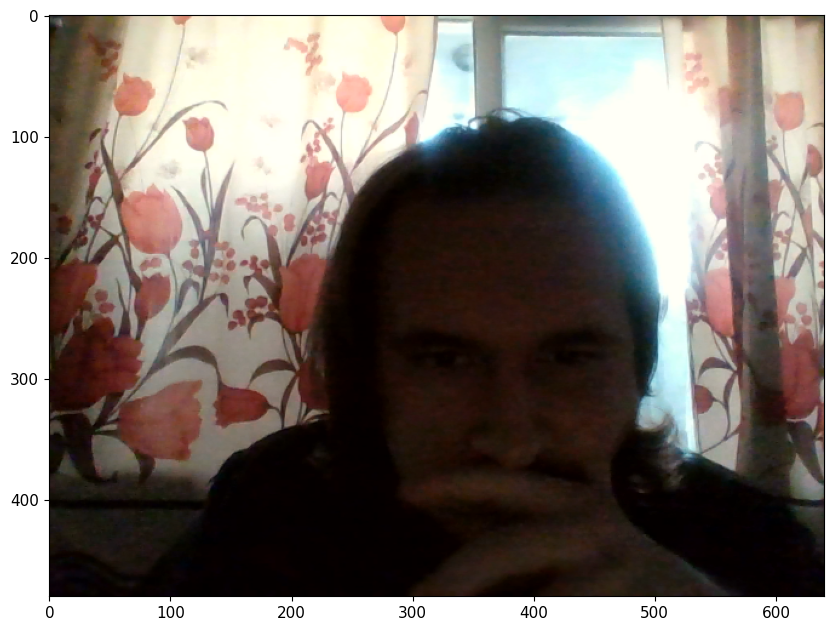

KeyboardInterrupt: 

In [8]:
# Set up the camera
cap = cv2.VideoCapture(0)  # Use 0 for the default camera (you can change it if you have multiple cameras)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Perform object detection using your pre-trained YOLOv5 model
    results = model(frame)

    # Display the results using matplotlib
    ax.clear()
    ax.imshow(cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
    plt.pause(0.1)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close the plot
cap.release()
cv2.destroyAllWindows()